In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **DATASET**

age - Tuổi của bệnh nhân

sex - Giới tính của bệnh nhân

cp - Loại đau ngực ~ 0 = Đau thắt ngực điển hình, 1 = Đau thắt ngực không điển hình, 2 = Đau thắt ngực không, 3 = Không có triệu chứng

trtbps - Huyết áp khi nghỉ ngơi (tính bằng mm Hg)

chol - Cholestoral tính bằng mg/dl được lấy qua cảm biến BMI

fbs - (đường huyết lúc đói > 120 mg/dl) ~ 1 = Đúng, 0 = Sai

restecg - Kết quả điện tâm đồ lúc nghỉ ~ 0 = Bình thường, 1 = Sóng ST-T bình thường, 2 = Phì đại thất trái

thalachh - Nhịp tim tối đa đạt được

oldpeak - Đỉnh trước đó

slp - Độ dốc

caa - Số dị thường động mạch vành

thall - Kết quả kiểm tra ứng suất Thalium ~ (0,3)

exng - Đau thắt ngực do gắng sức ~ 1 = Có, 0 = Không

output - Biến mục tiêu

In [23]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.shape

(303, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


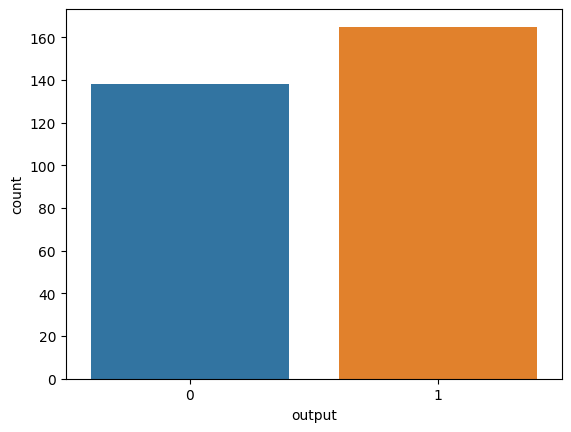

In [28]:
ax = sns.countplot(x= df["output"])

In [29]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


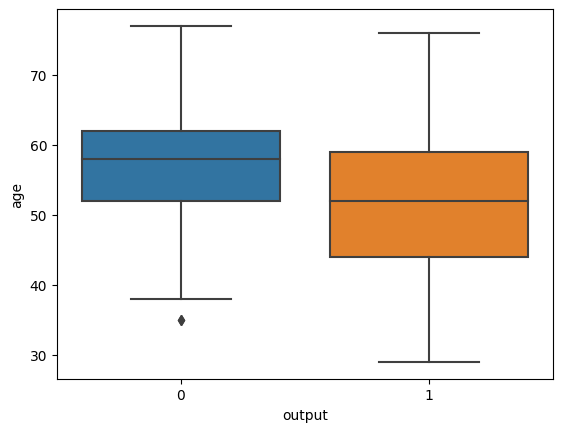

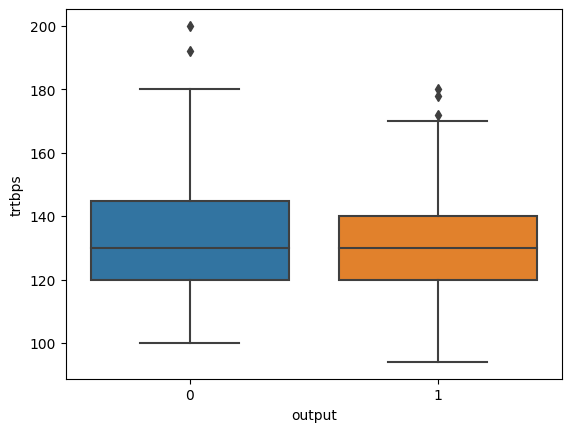

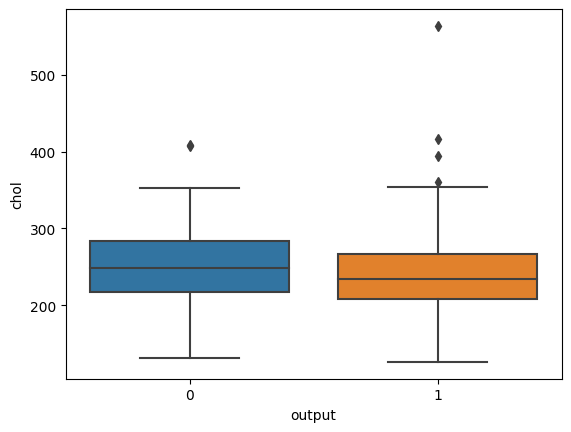

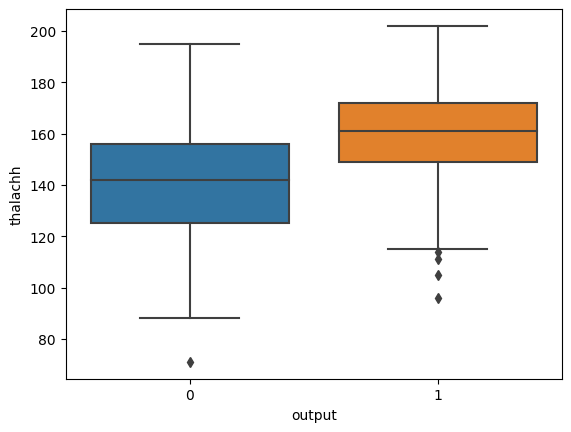

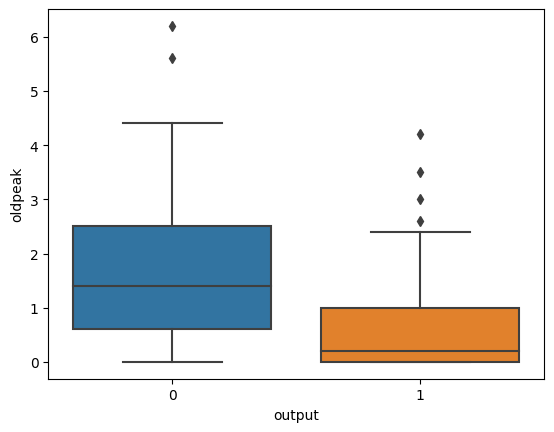

In [30]:
feature = ["age",	'trtbps',	'chol',	'thalachh',		'oldpeak',	]
for i in feature:
    sns.boxplot(x=df["output"], y=df[i])
    plt.show()

<Axes: >

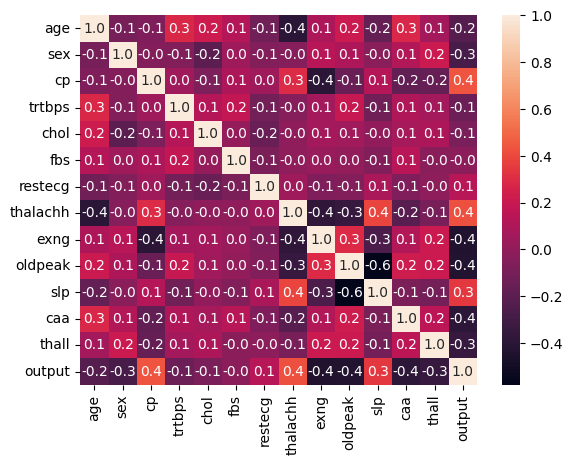

In [31]:
sns.heatmap(df.corr(),annot=True,fmt=".1f")

In [32]:
feature_col_nontree = ['age',	'sex',	'cp'	,'trtbps'	,'chol'	,'fbs'	,'restecg'	,'thalachh'	,'exng'	,'oldpeak'	,'slp'	,'caa'	,'thall']
target = ['output']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[feature_col_nontree],df[target] , test_size=0.2, random_state=0)

In [34]:
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
ro_scaler=MinMaxScaler()
X_train_scaled=ro_scaler.fit_transform(X_train)
X_test_scaled=ro_scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns[:])
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns[:])


#**MODEL SELECTION**

sử dụng tập train để model selection bằng các chia dữ liệu tập train thành 5 fold rồi lấy trung bình của các fold với từng hyperparameter

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'rbf',"poly", "sigmoid"]
}
std_results = {'linear': [], 'rbf': [],"poly":[], "sigmoid": []}
accuracy_results = {'linear': [], 'rbf': [],"poly":[], "sigmoid": []}
for kernel in param_grid['kernel']:
        print(f"Kernel: {kernel}")
        for C in param_grid['C']:
          svm = SVC(kernel=kernel, C=C, random_state=0)
          scores = cross_val_score(svm, X_train, y_train.values.ravel(), cv=5) #k-fold = 5
          accuracy_results[kernel].append(scores.mean())
          std_results[kernel].append(scores.std())
          print(f'C:{C}, Accuracy:{scores.mean()}')

Kernel: linear
C:0.1, Accuracy:0.8062074829931973
C:0.5, Accuracy:0.8143707482993197
C:1, Accuracy:0.8145408163265305
C:5, Accuracy:0.8102891156462585
C:10, Accuracy:0.8062074829931973
Kernel: rbf
C:0.1, Accuracy:0.7856292517006803
C:0.5, Accuracy:0.7939625850340136
C:1, Accuracy:0.7978741496598639
C:5, Accuracy:0.8021258503401361
C:10, Accuracy:0.7853741496598639
Kernel: poly
C:0.1, Accuracy:0.8142006802721088
C:0.5, Accuracy:0.8104591836734695
C:1, Accuracy:0.8142857142857143
C:5, Accuracy:0.8142857142857143
C:10, Accuracy:0.8226190476190476
Kernel: sigmoid
C:0.1, Accuracy:0.5660714285714286
C:0.5, Accuracy:0.7733843537414965
C:1, Accuracy:0.7322278911564626
C:5, Accuracy:0.7606292517006803
C:10, Accuracy:0.7482142857142857


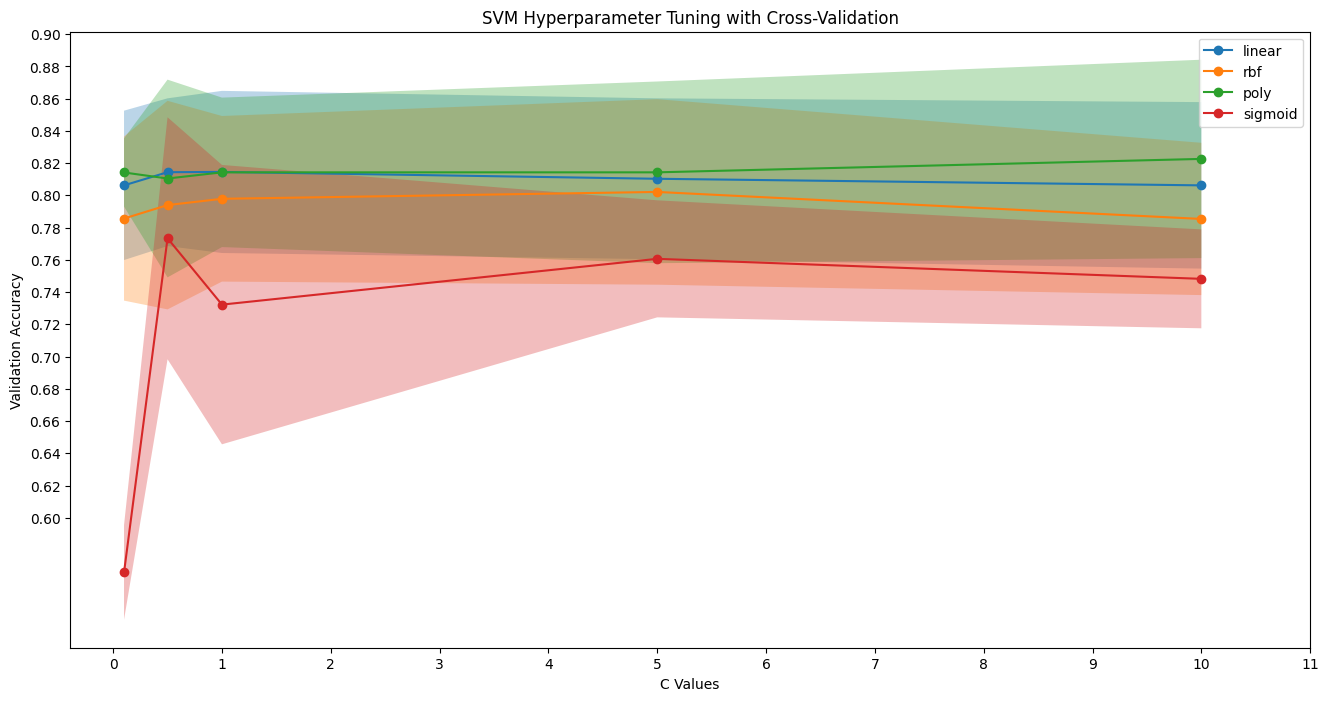

In [36]:
plt.figure(figsize=(16, 8))
for kernel in accuracy_results:
  plt.plot(param_grid['C'], accuracy_results[kernel], marker='o', label=kernel)
  plt.fill_between(param_grid['C'], np.array(accuracy_results[kernel]) - np.array(std_results[kernel]),
                     np.array(accuracy_results[kernel]) + np.array(std_results[kernel]), alpha=0.3)
plt.yticks(ticks=np.arange(0.6,0.9,step=0.02))
plt.xticks(ticks=np.arange(0,12,step=1))
plt.xlabel('C Values')
plt.ylabel('Validation Accuracy')
plt.title('SVM Hyperparameter Tuning with Cross-Validation')
plt.legend()
plt.show()

Hyperparameter tối ưu cho mô hình SVM là C = 10 kernel = 'poly'

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200,500,1000],
    'criterion': ['gini', 'entropy']
}

std_results = {'gini': [], 'entropy': []}
accuracy_results = {'gini': [], 'entropy': []}

for criterion in param_grid['criterion']:
    print(f"Criterion: {criterion}")
    for n_estimators in param_grid['n_estimators']:
        rd = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=0)
        scores = cross_val_score(rd, X_train, y_train.values.ravel(), cv=5)
        accuracy_results[criterion].append(scores.mean())
        std_results[criterion].append(scores.std())
        print(f'n_estimators: {n_estimators}, Accuracy: {scores.mean()}')

Criterion: gini
n_estimators: 50, Accuracy: 0.8064625850340136
n_estimators: 100, Accuracy: 0.8227040816326531
n_estimators: 200, Accuracy: 0.8267857142857142
n_estimators: 500, Accuracy: 0.8227040816326531
n_estimators: 1000, Accuracy: 0.8269557823129251
Criterion: entropy
n_estimators: 50, Accuracy: 0.8312074829931972
n_estimators: 100, Accuracy: 0.8311224489795919
n_estimators: 200, Accuracy: 0.830952380952381
n_estimators: 500, Accuracy: 0.8310374149659865
n_estimators: 1000, Accuracy: 0.830952380952381


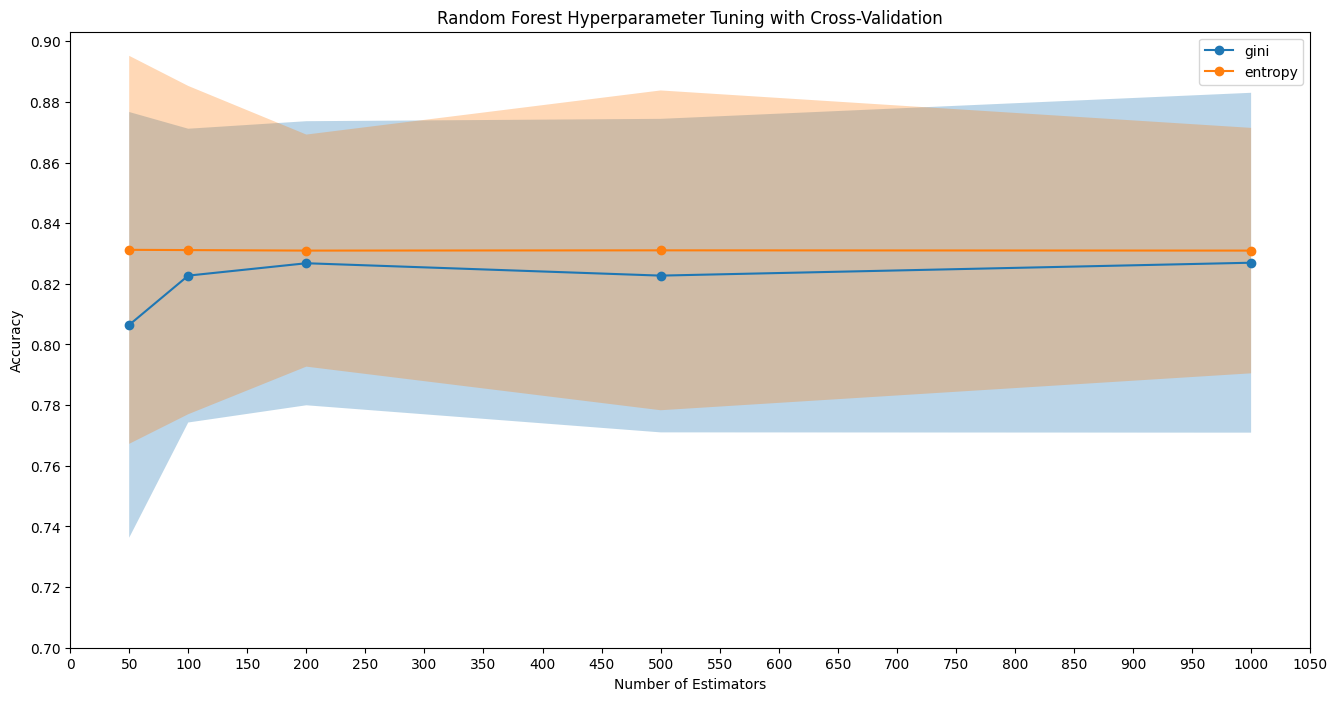

In [38]:
plt.figure(figsize=(16, 8))
for criterion in accuracy_results:
    plt.plot(param_grid['n_estimators'], accuracy_results[criterion], marker='o', label=criterion)
    plt.fill_between(param_grid['n_estimators'], np.array(accuracy_results[criterion]) - np.array(std_results[criterion]),
                     np.array(accuracy_results[criterion]) + np.array(std_results[criterion]), alpha=0.3)

plt.yticks(ticks=np.arange(0.7, 0.9, step=0.02))
plt.xticks(ticks=np.arange(0, 1100, step=50))
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Hyperparameter Tuning with Cross-Validation')
plt.legend()
plt.show()

Hyperparameter tối ưu cho mô hình Random Forest là n_estimators = 50 và criterion = 'entropy'

sau khi model selection chúng ta có dc hyperparameter cho 2 mô hình từ đó huấn luyện với bộ dữ liệu train test đã chia từ trc

In [39]:
rd = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
rd.fit(X_train, y_train.values.ravel())
y_pred_rd = rd.predict(X_test)
rd_result = accuracy_score(y_test,y_pred_rd)
print(f'Random Forest accuracy = {rd_result}')
print(classification_report(y_test,y_pred_rd))

Random Forest accuracy = 0.819672131147541
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.90      0.76      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [41]:
svm = SVC(kernel='poly', C=10, random_state=0)
svm.fit(X_train, y_train.values.ravel())
y_pred_svm = svm.predict(X_test)
svm_result = accuracy_score(y_test,y_pred_svm)
print(f'Support Vector Machine accuracy = {svm_result}')
print(classification_report(y_test,y_pred_svm))

Support Vector Machine accuracy = 0.6721311475409836
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        27
           1       0.77      0.59      0.67        34

    accuracy                           0.67        61
   macro avg       0.68      0.68      0.67        61
weighted avg       0.69      0.67      0.67        61

